# Import all Important Packages

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 - Data collection

In [26]:
boston_data = pd.read_csv("./BostonHousing.csv")

# Check whether read_csv is successful or not
# Check data format loaded through read_csv
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Step 2 - Data wrangling

In [27]:
# Input or independent value
X = boston_data.iloc[:, :13]

# Output or dependent value
Y = boston_data["medv"]

# Step 3 - Data Analysis

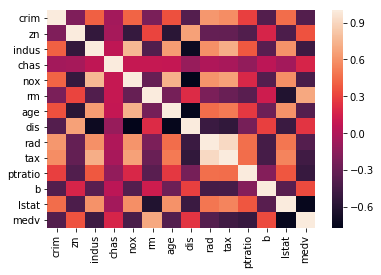

In [28]:
# Find correlation between all available columns
corr = boston_data.corr()
# Find correlated data columns using heatmaps
sns.heatmap(corr)
plt.show()

# Columns which are having correlation +ve and above 0.9 are highly correlated to each other
# We can drop any of them since it will not impact on output

#Right now I am not dropping any column and trying to predict the output with all input data

# Step 4 - Splitting train test data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=10)

# Step 5 - Model Instantiation and training the model

In [30]:
# model instantiation
linear_model = LinearRegression()

# fit the model with input and corresponding output data
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Step 6 - Testing the model

In [31]:
predicted_house_price = linear_model.predict(x_test)
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[31.4243217  31.96785487 30.93785448 22.34313349 18.83846235 16.20617519
 35.92908162 14.74157477 25.07700756 37.13230282 21.47652971 30.92661826
 28.07823424 34.02599249 33.7778476  40.63701192 24.25899783 23.43019291
 25.547906   21.34469147 32.65467539 17.80506124 25.46149722 25.0207691
 32.51742137 20.51357936 19.47165255 16.87107974 38.44316206  0.3888111
 32.39559257 32.15518102 26.05305015 23.82049084 20.56494632 19.66990981
  3.53212643 35.21058387 27.03280773 27.67994129 34.36642896 29.82003002
 18.31717228 31.55109654 17.93465111 28.4618882  19.39950216 21.60782793
 38.10391926 16.45101411 24.51003632 19.57072199 24.53359986 34.34589029
 26.74381857 34.86340026 21.02859444 19.77400901 18.68461884 24.64911818
 19.89923131 23.52871967 39.56690084 42.81848202 30.38116596 16.96889789
 23.83550068  3.18952008 31.52469303 28.66536677 18.40003941 27.1252398
 19.56625808 25.28579071 25.04642543 10.30562974 38.97693514  8.17901104
 18.51160158 30.32060192 22.858

In [32]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Actual_Prices  Predicted_Prices
305           28.4         31.424322
193           31.1         31.967855
65            23.5         30.937854
349           26.6         22.343133
151           19.6         18.838462
433           14.3         16.206175
161           50.0         35.929082
129           14.3         14.741575
269           20.7         25.077008
226           37.6         37.132303
107           20.4         21.476530
222           27.5         30.926618
181           36.2         28.078234
275           32.0         34.025992
277           33.1         33.777848
262           48.8         40.637012
325           24.6         24.258998
184           26.4         23.430193
176           23.2         25.547906
154           17.0         21.344691
157           41.3         32.654675
446           14.9         17.805061
114           18.5         25.461497
324           25.0         25.020769
192           36.4         32.517421


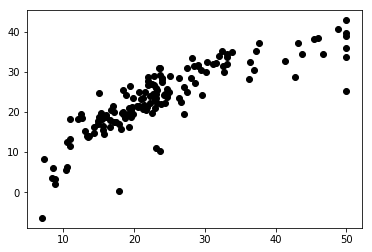

In [33]:
plt.scatter(y_test, predicted_house_price, color='black')
plt.show()